<div style="background-color:#e0f7fa; border-left: 8px solid #00796b; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h1 style="text-align:center; color:#004d40; font-size: 28px; margin-bottom: 10px;">Workshop 4: Simple Univariate Linear Regression</h1>
    <h3 style="text-align:center; color:#00695c;">July 20, 2025</h3>
    <hr style="border-top: 1px solid #004d40;">
    <p style="font-size: 16px; line-height: 1.5; color:#333;">
    In this assignment, we will use a <b>Simple Univariate Linear Regression</b> to fit a line to the given data points. Linear regression models the relationship between one variable <b>X</b> and an output variable <b>Y</b> by finding the best-fitting straight line. We will apply Gradient Descent to iteratively update the line parameters θ0 and θ1 starting from zero, minimizing the sum of squared errors (SSE). The process stops once SSE is less than <b>0.5</b>, ensuring the line closely fits the samples.
    </p>
    <p style="font-size: 16px; color:#555;"><b>Contributors:</b> Sanuja Vihanga Senadeera, Naveen Karan Krishna, Thi Anh Tram Le, Mayra Geraldine Reinoso Varon, Justin Kyle Pedro</p>
</div>

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation of code

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation/interpretation of result

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">1. Import Libraries</h2>
</div>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code imports libraries needed for data manipulation, numerical operations, visualization, and machine learning:

- `pandas` (`pd`): For handling and manipulating tabular data in DataFrames.

- `numpy` (`np`): Provides support for numerical operations, arrays, and mathematical functions.

- `matplotlib.pyplot` (`plt`): For creating static and interactive plots to visualize data and results.

- `mean_squared_error`: A metric from scikit-learn to measure the average squared difference between predicted and actual values. And the sum of squared errors will be calculated from MSE.

- `LinearRegression`: A scikit-learn model that fits a linear regression using a closed-form solution (normal equation).

- `SGDRegressor`: A scikit-learn model that fits linear regression using stochastic gradient descent, an iterative optimization algorithm suitable for large datasets.

</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">2. Data Creation</h2>
</div>

In [46]:
# Creating the dataset using a dictionary
data = {'X': [1, 2, 3], 'Y': [3, 5, 7]}

# converting the dictionary into a pandas dataframe
df = pd.DataFrame(data)

# Previewing the dataframe
df.head()

,X,Y
0,1,3
1,2,5
2,3,7


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates and previews a simple dataset:

- A dictionary `data` is created with two keys: `'X'` and `'Y'`. Each key holds a list of numbers representing feature values (`X`) and corresponding target values (`Y`).

- `pd.DataFrame(data)` converts the dictionary into a pandas DataFrame, a tabular data structure that is easy to manipulate and analyze.

- `df.head()` displays the first few rows (by default, 5) of the DataFrame, allowing us to quickly inspect the dataset.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">3. Data Exploration</h2>
</div>

In [50]:
# To check the datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       3 non-null      int64
 1   Y       3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

The `df.info()` command provides a quick summary of the DataFrame:

- Displays the total number of rows and columns.

- Lists all column names and their data types (e.g., integer, float, object).

- Shows how many non-null (non-missing) values each column contains.

- Reports the memory usage of the DataFrame.

In [53]:
# To check the basic statistics of the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,3.0,2.0,1.0,1.0,1.5,2.0,2.5,3.0
Y,3.0,5.0,2.0,3.0,4.0,5.0,6.0,7.0


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

The `df.describe().T` command displays basic statistical summaries for each numeric column in the DataFrame, and transposes the output for better readability:

- count: Number of non-null entries.

- mean: Average value.

- std: Standard deviation, showing how spread out the values are.

- min: Minimum value.

- 25% / 50% / 75%: Quartiles, showing the distribution of the data.

- max: Maximum value.

This helps us quickly understand the central tendency and spread of your dataset.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">4. Feature Selection</h2>
</div>

In [57]:
# Prepare Feature and Target
X = df[['X']]
Y = df['Y']

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code separates the dataset into **features (X)** and **target (Y)** for model training:

- `X = df[['X']]`: Extracts the feature column as a 2D DataFrame. Machine learning models often expect input features in 2D format, even if there's only one feature.

- `Y = df['Y']`: Extracts the target variable as a 1D Series, which is the expected format for most models when predicting a single output.

This step is essential for preparing the data before fitting a regression.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">5. Linear Regression</h2>
</div>

## 5.1 Linear Regression Model (Closed-form)

In [62]:
# Create Linear Regression (closed-form)
lr_model = LinearRegression()

# Fitting the model to the feature and target
lr_fit = lr_model.fit(X,Y)

# Predict the model
Y_pred_lr = lr_fit.predict(X)

# Calculate the Sum of Squared Errors
mse_lr = mean_squared_error(Y, Y_pred_lr)
sse_lr = mse_lr * len(Y)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code implements **Linear Regression using the closed-form solution** (also known as the **Normal Equation** method). 

- `LinearRegression()`: Initializes a Linear Regression model from scikit-learn.

- `fit(X, Y)`: Trains the model by finding the best-fitting line that minimizes prediction errors using the least squares method.

- `predict(X)`: Uses the trained model to make predictions on the input features.

- `mean_squared_error(Y, Y_pred_lr)`: Calculates the average squared difference between actual and predicted values.

- `sse_lr = mse_lr * len(Y)`: Converts Mean Squared Error (MSE) to Sum of Squared Errors (SSE) by multiplying it by the number of samples, providing a total error measure.

This approach gives the exact solution without iterations, suitable for small datasets or when performance is not a concern.

In [65]:
# Print the results
print("LinearRegression (Closed-form):")
print(f"Intercept: {lr_model.intercept_:.4f}")
print(f"Coefficient: {lr_model.coef_[0]:.4f}")
print(f"SSE: {sse_lr:.4f}")
print(f"Final Model Equation: y = {lr_model.intercept_:.4f} + {lr_model.coef_[0]:.4f} * x\n")

LinearRegression (Closed-form):
Intercept: 1.0000
Coefficient: 2.0000
SSE: 0.0000
Final Model Equation: y = 1.0000 + 2.0000 * x



<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Linear Regression Closed-form Model Interpretation</h2>


* **Intercept (1.0000):**
  This is the predicted value of **y** when the feature **x** is zero. In other words, when x = 0, the model predicts y = 1. This serves as the baseline value for the dependent variable.

* **Coefficient (2.0000):**
  This indicates the slope of the regression line. For every one unit increase in **x**, the predicted value of **y** increases by 2 units. It represents the strength and direction of the relationship between **x** and **y**.

* **Sum of Squared Errors (SSE = 0.0000):**
  SSE measures the total squared difference between the actual values and the predicted values. Here, SSE is zero, which means the model perfectly fits the data points with no error. This suggests the data is perfectly linear and fits the equation exactly.

* **Final Model Equation:**

  
  <center>y = 1.0000 + 2.0000 * x</center>
  

  This equation can be used to predict **y** given any value of **x**.

  

### Summary:

The model shows a perfect linear relationship between **x** and **y** with no prediction error. Every increase in the independent variable x results in a consistent increase of 2 in the dependent variable y, starting from a baseline of 1 when x = 0.


</div>

## 5.2 SGD Regressor Model (Stochastic Gradient Descent)

In [69]:
# Create SGD Regressor Model
sgd_model = SGDRegressor(loss = 'squared_error',
                         learning_rate = 'constant',
                         eta0 = 0.1,
                         max_iter = 1000,
                         tol = 1e-3,
                         random_state = 29)

# Fit the model to the feature and target variables
sgd_fit = sgd_model.fit(X, Y)

# Predict the model
Y_pred_sgd = sgd_fit.predict(X)

# Calculate the Sum of Squared Errors
mse_sgd = mean_squared_error(Y, Y_pred_sgd)
sse_sgd = mse_sgd * len(Y)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code performs **Linear Regression using Stochastic Gradient Descent (SGD)**, an iterative optimization technique commonly used for large-scale data:

- `SGDRegressor()`: Initializes the model with specific parameters:

    - `loss='squared_error'`: Uses Mean Squared Error as the loss function.

    - `learning_rate='constant'` and `eta0=0.1`: Sets a fixed learning rate of 0.1 for each update.

    - `max_iter=1000`: Allows up to 1000 iterations for training.

    - `tol=1e-3`: Training stops if the model converges before hitting 1000 iterations.

    - `random_state=29`: Ensures reproducibility.

- `sgd_fit = sgd_model.fit(X, Y)`: Trains the model using the feature (`X`) and target (`Y`) data.

- `Y_pred_sgd = sgd_fit.predict(X)`: Generates predictions using the trained SGD model.

- `mean_squared_error(Y, Y_pred_sgd)`: Computes the Mean Squared Error (MSE).

- `sse_sgd = mse_sgd * len(Y)`: Converts MSE to **Sum of Squared Errors (SSE)** to match the evaluation metric used in the assignment.

This approach simulates how gradient descent updates the model step-by-step until it converges to a good approximation of the best-fit line.

</div>

In [72]:
# Print the results
print("\nSGDRegressor (Gradient Descent):")
print(f"Intercept: {sgd_model.intercept_[0]:.4f}")
print(f"Coefficient: {sgd_model.coef_[0]:.4f}")
print(f"SSE: {sse_sgd:.4f}")
print(f"Final Model Equation: y = {sgd_model.intercept_[0]:.4f} + {sgd_model.coef_[0]:.4f} * x\n")


SGDRegressor (Gradient Descent):
Intercept: 0.9104
Coefficient: 2.0370
SSE: 0.0035
Final Model Equation: y = 0.9104 + 2.0370 * x



<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> SGD Regression Model Interpretation</h2>

* **Intercept (0.9104):**
  When the feature x = 0, the model predicts the target y to be approximately 0.9104. This is the baseline prediction before considering the effect of x.

* **Coefficient (2.0370):**
  This coefficient means for every one unit increase in x, the predicted y increases by about 2.0370 units. It shows a strong positive linear relationship between x and y, similar to the closed-form solution but with a slight difference.

* **Sum of Squared Errors (SSE = 0.0035):**
  This value quantifies the total squared error between the actual y values and the predicted values from the model. The SSE is very small but not zero, indicating the model fits the data very well but not perfectly. Small residual error is typical in iterative optimization methods like SGD due to approximation and stopping criteria.

* **Final Model Equation:**

  
  <center>y = 0.9104 + 2.0370 * x</center>
  

  This equation predicts y based on x using the SGD-optimized parameters.

### Summary:

The SGDRegressor model has found a nearly perfect linear fit, very close to the closed-form Linear Regression solution. The minor differences in intercept and coefficient values, and the small but non-zero SSE, reflect the approximate nature of gradient descent optimization, stopping when changes become sufficiently small (within tolerance).


</div>

## 5.3 Linear Regression using Manual Gradient Descent

In [76]:
# Initialize the parameters
X_vals = df['X'].values
Y_vals = df['Y'].values
m = len(X_vals)
theta_0 = 0.0
theta_1 = 0.0
alpha = 0.1
sse = float('inf')
threshold = 0.5
iteration = 1

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This block initializes the setup for implementing **manual gradient descent** for linear regression:

- `X_vals = df['X'].values` and `Y_vals = df['Y'].values`
Extracts the feature and target columns from the dataframe as NumPy arrays for numerical operations.

- `m = len(X_vals)`
Represents the total number of data points.

- `theta_0 = 0.0` and `theta_1 = 0.0`
Initial values of the intercept and slope (parameters to be learned).

- `alpha = 0.1`
The learning rate, controls how large each update step is during training. A moderate value helps balance speed and stability.

- `sse = float('inf')`
SSE is initialized to infinity to ensure the loop starts. It will be updated after each iteration.

- `threshold = 0.5`
The stopping condition, the loop will stop once SSE is less than this value, indicating good model accuracy.

- `iteration = 1`
Counter to track the number of training iterations.

In [79]:
# To store history for plotting
sse_history = []

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This line initializes an empty list `sse_history` to record the Sum of Squared Errors at each iteration, allowing us to track and visualize the model’s error reduction over time during training.

</div>

In [82]:
# Iteration loop
while True:
    # Predictions
    Y_pred = theta_0 + theta_1 * X_vals
    
    # Errors
    errors = Y_pred - Y_vals
    sse = np.sum(errors ** 2)
    sse_history.append(sse)

    # Check for convergence
    if sse < threshold:
        break

    # Gradients
    s0 = np.sum(errors)
    s1 = np.sum(errors * X_vals)

    # Parameter Updates
    theta_0 -= alpha * (s0 / m)
    theta_1 -= alpha * (s1 / m)

    iteration += 1
    
Y_pred_manual_final = theta_0 + theta_1 * X_vals

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code performs the core of **manual gradient descent** for linear regression by iteratively updating the parameters until the error is sufficiently low:

- **Predictions**: Calculate predicted values using current parameters.

- **Errors and SSE**: Compute the difference between predictions and actual values, then calculate and record the Sum of Squared Errors (SSE).

- **Convergence Check**: If SSE is below the defined threshold, the loop stops, indicating the model has learned well enough.

- **Gradients Calculation**: Calculate gradients (slopes of the error surface) for both parameters, representing the direction and magnitude to adjust.

- **Parameter Updates**: Adjust the intercept (`theta_0`) and slope (`theta_1`) by moving against the gradient, scaled by the learning rate and normalized by the number of samples.

- **Iteration Count**: Increment the iteration counter to track how many updates occur.

- **Final Prediction**: After convergence, compute the final predicted values with the optimized parameters.

This iterative process refines the model step-by-step to minimize prediction error.

In [85]:
# Output Results
print("Final Predictions =", Y_pred_manual_final)
print(f"Converged in {iteration} iterations")
print(f"Theta 0 (intercept): {theta_0:.4f}")
print(f"Theta 1 (slope): {theta_1:.4f}")
print(f"Final SSE: {sse:.4f}")
print(f"Final Model Equation: y = {theta_0:.4f} + {theta_1:.4f} * x\n")

Final Predictions = [2.83046049 4.79225062 6.75404074]
Converged in 5 iterations
Theta 0 (intercept): 0.8687
Theta 1 (slope): 1.9618
Final SSE: 0.1324
Final Model Equation: y = 0.8687 + 1.9618 * x



<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Manual Gradient Descent Model Interpretation</h2>

* **Intercept (θ0 = 0.8687)**:
  This is the predicted value of y when the feature x = 0. The model estimates y of 0.8687 at zero input, representing the baseline level of the target variable.

* **Slope (θ1 = 1.9618)**:
  This coefficient means for every one unit increase in x, the predicted value of y increases by approximately 1.9618 units. It shows a strong positive linear relationship between x and y, close to the ideal coefficient of 2.

* **Final Sum of Squared Errors (SSE = 0.1324)**:
  SSE measures the total squared difference between the actual y values and those predicted by the model. A value of 0.1324 indicates a fairly good fit, though there is some residual error. This is expected since this manual gradient descent used a stopping threshold rather than fully minimizing the SSE.

* **Convergence (in 5 iterations)**:
  The model converged quickly, within 5 iterations, to a solution where the SSE dropped below the threshold of 0.5. This shows the gradient descent process was efficient with the chosen learning rate (0.1).

* **Final Model Equation:**

  
  <center>y = 0.8687 + 1.9618 * x</center>
  

  This equation can be used to predict y values given any x.

* **Final Predictions:**
  For the given X values, the model predicts y values approximately as [2.83, 4.79, 6.75], reflecting the learned linear relationship.


### Summary:

The manual gradient descent implementation successfully found a linear model closely approximating the ideal relationship y = 1 + 2x, with slightly lower slope and intercept than the closed-form solution. The model fit is reasonably accurate with some residual error (SSE > 0) and converged quickly due to an effective learning rate and stopping threshold.


</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">6. Plotting the Model</h2>
</div>

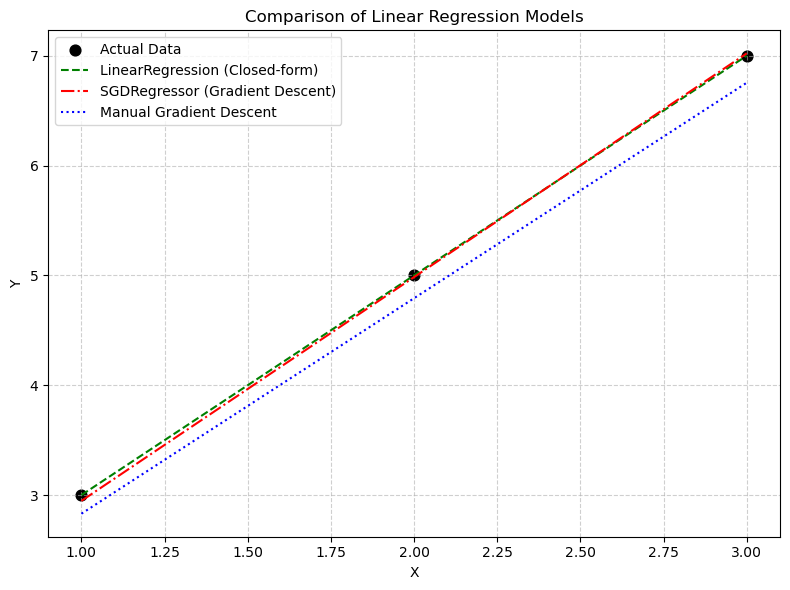

In [89]:
# Plot all models
plt.figure(figsize=(8, 6))
plt.scatter(X_vals, Y_vals, color='black', label='Actual Data', s=60)

plt.plot(X_vals, Y_pred_lr, color='green', linestyle='--', label='LinearRegression (Closed-form)')
plt.plot(X_vals, Y_pred_sgd, color='red', linestyle='-.', label='SGDRegressor (Gradient Descent)')
plt.plot(X_vals, Y_pred_manual_final, color='blue', linestyle=':', label='Manual Gradient Descent')

plt.title('Comparison of Linear Regression Models')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Interpretation of Comparison of All Models</h2>

The chart compares different linear regression methods on the same dataset. The **black dots** represent actual data points. The **green dashed line** (closed-form LinearRegression) and the **red dash-dot line** (SGDRegressor) closely overlap, indicating both accurately model the data. In contrast, the **blue dotted line** (Manual Gradient Descent) deviates from the others, likely due to incomplete convergence. This highlights that while all methods aim to fit the same linear relationship, their performance can vary based on implementation and optimization efficiency.


</div>

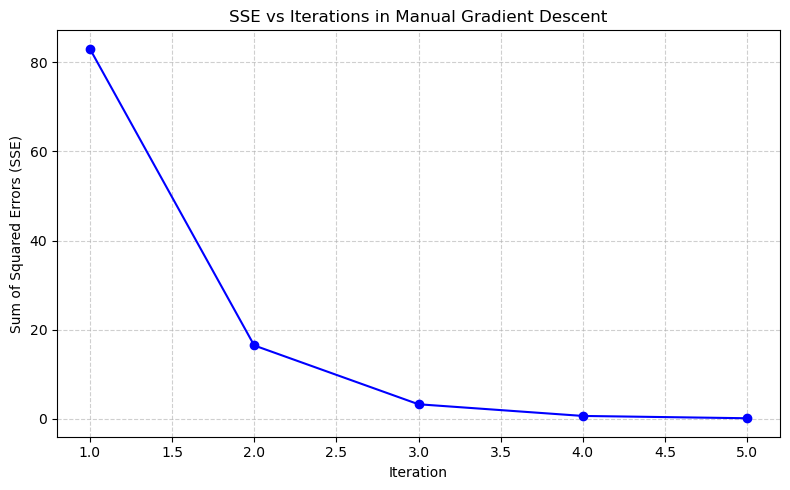

In [92]:
# Plot SSE and Iterations for Manual Gradient Descent Model
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sse_history) + 1), sse_history, marker='o', color='blue')
plt.title('SSE vs Iterations in Manual Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Interpretation of SSE vs Iteration in Manual Gradient Descent</h2>

The chart illustrates that manual gradient descent effectively reduces the Sum of Squared Errors (SSE) over 5 iterations. A sharp drop in error occurs in the first few steps, followed by gradual convergence toward zero. This indicates that the model is learning and improving its fit with each iteration, although further steps or tuning may be needed for optimal accuracy.


</div>

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Final Comparative Interpretation</h2>


### **Comparison of Linear Regression Models**

| Aspect                  | **Linear Regression (Closed-form)** | **SGDRegressor (Gradient Descent)**     | **Manual Gradient Descent**         |
| ----------------------- | ----------------------------------- | --------------------------------------- | ----------------------------------- |
| **Intercept**           | 1.0000                              | 0.9104                                  | 0.8687                              |
| **Coefficient (Slope)** | 2.0000                              | 2.0370                                  | 1.9618                              |
| **Final SSE**           | 0.0000                              | 0.0035                                  | 0.1324                              |
| **Model Equation**      | y = 1.0000 + 2.0000x                | y = 0.9104 + 2.0370x                    | y = 0.8687 + 1.9618x                |
| **Fit Quality**         | Perfect fit                         | Near-perfect fit                        | Close but less accurate             |
| **Convergence Type**    | Exact solution (analytical)         | Iterative (stochastic gradient descent) | Iterative (manual gradient descent) |
| **Iterations**          | Not needed                          | Auto-stopped based on tolerance         | Stopped at 5 iterations             |


### **Interpretation Summary**

* **Linear Regression (Closed-form)** produces a **perfect fit** to the data, with a Sum of Squared Errors (SSE) of **zero**, showing that the model captures the exact linear relationship between `x` and `y`. This is expected with small, perfectly linear datasets.

* **SGDRegressor**, using stochastic gradient descent, gives a model **very close** to the closed-form solution. Its minimal SSE (**0.0035**) and nearly identical slope/intercept reflect successful convergence, with only minor approximation due to its iterative nature.

* **Manual Gradient Descent**, while showing good convergence within just **5 iterations**, results in a slightly **less accurate fit**, with a higher SSE (**0.1324**) and slightly off parameters. Still, it effectively captures the trend and demonstrates the learning process well.

### **Conclusion**

All three models successfully learn the linear relationship between `x` and `y`. The **closed-form** model is the most precise, the **SGDRegressor** is an efficient approximation with minor error, and the **manual gradient descent** provides valuable educational insight into model convergence, despite its slightly lower accuracy.

This comparison highlights both the **strength of automated tools** and the **learning value of manual implementation** in understanding regression mechanics.



</div>